In [35]:
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [36]:
seed = 3141
np.random.seed(seed)

In [37]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [38]:
X=np.concatenate((x_train,x_test))
Y=np.concatenate((y_train,y_test))

In [39]:
from sklearn.model_selection import train_test_split
x_train,x_temp,y_train,y_temp=train_test_split(X,Y,test_size=0.3,random_state=42,shuffle=False)
x_val,x_test,y_val,y_test=train_test_split(x_temp,y_temp,shuffle=False,test_size=0.5)


Training data: 
Label of the image is 3


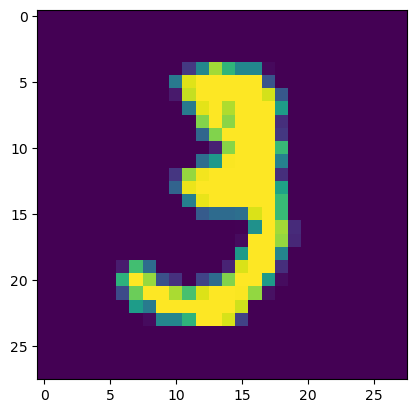

In [40]:
print('Training data: ')
plt.imshow(x_train[10])
plt.show
print('Label of the image is',y_train[10])

In [41]:
x_train=np.reshape(x_train,(-1,28,28,1))
x_test=np.reshape(x_test,(-1,28,28,1))
x_val=np.reshape(x_val,(-1,28,28,1))


In [42]:
x_train=x_train/255.0
x_test=x_test/255.0
x_val=x_val/255.0

In [43]:
from tensorflow.keras.utils import to_categorical
y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)
y_val=to_categorical(y_val,10)

In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint

In [54]:
early_stopping = EarlyStopping(monitor='val_loss',min_delta=0.01, patience=3, restore_best_weights=True)
Model_checkpoint=ModelCheckpoint(filepath='./Mnist_numbers_classification_Conv2D_model.h5',
                                 monitor='val_loss',
                                 verbose=1,
                                 mode='min',
                                 save_best_only=True,
                                 save_weights_only=False)

In [55]:
model=Sequential([
    Conv2D(32,kernel_size=5,activation='relu',input_shape=(28,28,1),padding='same',strides=1),
    BatchNormalization(),
    MaxPooling2D(padding='same'),
    Conv2D(64,kernel_size=5,activation='relu',padding='same',strides=1),
    BatchNormalization(),
    MaxPooling2D(padding='same'),
    Conv2D(128,kernel_size=5,activation='relu',padding='same',strides=1),
    BatchNormalization(),
    MaxPooling2D(padding='same'),
    Flatten(),
    Dense(512,activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(256,activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(10,activation='softmax')
])

In [56]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [57]:
model.fit(x_train,y_train, batch_size=128,validation_data=(x_val, y_val), epochs=20,callbacks=[early_stopping,Model_checkpoint])

Epoch 1/20
383/383 [==============================] - ETA: 0s - loss: 0.1148 - accuracy: 0.9644
Epoch 1: val_loss improved from inf to 3.86071, saving model to .\Mnist_numbers_classification_Conv2D_model.h5
383/383 [==============================] - 193s 498ms/step - loss: 0.1148 - accuracy: 0.9644 - val_loss: 3.8607 - val_accuracy: 0.2387
Epoch 2/20


c:\Users\ELZAHBIA\anaconda3\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


383/383 [==============================] - ETA: 0s - loss: 0.0414 - accuracy: 0.9873
Epoch 2: val_loss improved from 3.86071 to 0.05300, saving model to .\Mnist_numbers_classification_Conv2D_model.h5
383/383 [==============================] - 182s 475ms/step - loss: 0.0414 - accuracy: 0.9873 - val_loss: 0.0530 - val_accuracy: 0.9846
Epoch 3/20
383/383 [==============================] - ETA: 0s - loss: 0.0279 - accuracy: 0.9913
Epoch 3: val_loss improved from 0.05300 to 0.03591, saving model to .\Mnist_numbers_classification_Conv2D_model.h5
383/383 [==============================] - 175s 458ms/step - loss: 0.0279 - accuracy: 0.9913 - val_loss: 0.0359 - val_accuracy: 0.9897
Epoch 4/20
383/383 [==============================] - ETA: 0s - loss: 0.0228 - accuracy: 0.9925
Epoch 4: val_loss did not improve from 0.03591
383/383 [==============================] - 184s 480ms/step - loss: 0.0228 - accuracy: 0.9925 - val_loss: 0.0393 - val_accuracy: 0.9894
Epoch 5/20
383/383 [=====================

In [58]:
model.evaluate(x_test,y_test)


329/329 [==============================] - 10s 29ms/step - loss: 0.0365 - accuracy: 0.9892


[0.03650705888867378, 0.9892380833625793]

In [60]:
model.save('my_model.keras')

In [61]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred,axis = 1)
y_true = np.argmax(y_test,axis = 1)

329/329 [==============================] - 9s 28ms/step


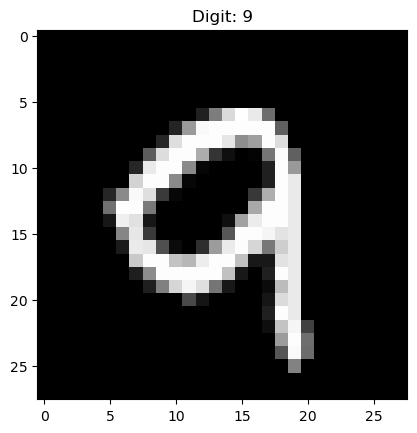

In [63]:
plt.imshow(x_test[2001].reshape(28, 28), cmap='gray')
plt.title("Digit: {}".format(y_pred_classes[2001]))
plt.show()
